In [16]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
# import datasets
from sklearn import datasets

In [18]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [19]:
# Load Data
iris = datasets.load_iris()
x = iris.data
y = iris.target

In [21]:
# split dataset into training set and test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [22]:
# Create adaboost Classifier object
abc = AdaBoostClassifier(n_estimators=50,learning_rate=1)

In [23]:
# Train Adaboost classifier
model = abc.fit(x_train,y_train)

In [24]:
#Predict the response for test dataset
y_pred = model.predict(x_test)

In [25]:
# Model Accuracy, how oftern is the classifier correct?
print("Accuracy: ",metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.9333333333333333


In [28]:
## USING SVC 
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
# Import Support Vector Classifier
from sklearn.svm import SVC
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
svc=SVC(probability=True, kernel='linear')
# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(x_train, y_train)
#Predict the response for test dataset
y_pred = model.predict(x_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9777777777777777


In [ ]:
# Example 2

In [30]:
import pandas as pd
data = pd.read_csv("apples_and_oranges.csv")

In [31]:
data.head()

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange


In [32]:
# spliting the dataset into training and test samples
from sklearn.model_selection import train_test_split
training_set,test_set = train_test_split(data,test_size=0.2,random_state =1)

In [33]:
# Classifying the predictors and target
X_train = training_set.iloc[:,0:2].values
Y_train = training_set.iloc[:,2].values
X_test = test_set.iloc[:,0:2].values
Y_test = test_set.iloc[:,2].values

In [34]:
# Initalizing Adaboost classifier and fitting the traing data
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(n_estimators=100,base_estimator=None,learning_rate=1,random_state=1)
adaboost.fit(X_train,Y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
          n_estimators=100, random_state=1)

In [35]:
# Predicting the Classes for test set
Y_pred = adaboost.predict(X_test)

In [41]:
# Attaching the predictions to test set for comparing
test_set["Predictions"] = Y_pred
test_set

,Weight,Size,Class,Predictions
2,65,4.09,orange,orange
31,66,4.68,orange,orange
3,72,5.85,apple,apple
21,70,4.83,orange,orange
27,70,4.22,orange,orange
29,71,5.26,apple,apple
22,69,4.61,orange,orange
39,73,5.03,apple,apple


In [43]:
# Calculating the accurary of the predictions
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)
accuracy = float(cm.diagonal().sum())/len(Y_test)
print("\nAccuracy of AdaBoost for the Given Dataset : ",accuracy)


Accuracy of AdaBoost for the Given Dataset :  1.0


In [44]:
# Visualizing the predictions
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_train = le.fit_transform(Y_train)

In [45]:
# Fitting the encoded data to AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(n_estimators=100,base_estimator=None,learning_rate=1,random_state=1)
adaboost.fit(X_train,Y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
          n_estimators=100, random_state=1)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


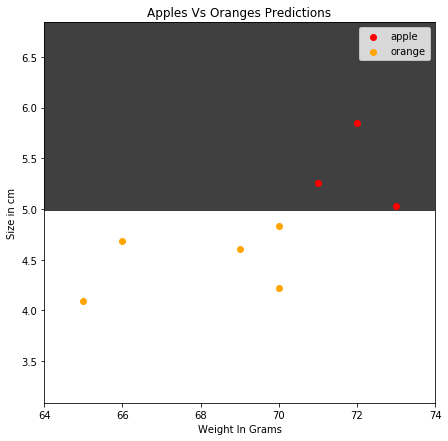

In [50]:
#Visualising
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
plt.figure(figsize = (7,7))
X_set, y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, adaboost.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
alpha = 0.75, cmap = ListedColormap(('black', 'white')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
c = ListedColormap(('red', 'orange'))(i), label = j)

plt.title('Apples Vs Oranges Predictions')
plt.xlabel('Weight In Grams')
plt.ylabel('Size in cm')
plt.legend()
plt.show()

In [ ]:
# Adaboost Regressor

In [51]:
# Load Libraries
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [52]:
# Data preparation
boston = load_boston()
x, y = boston.data, boston.target
xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.15)

In [53]:
ada_reg = AdaBoostRegressor(n_estimators=100)
print(ada_reg)
AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=100, random_state=None)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=100, random_state=None)


AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=100, random_state=None)

In [54]:
# Fit Model
ada_reg.fit(xtrain, ytrain)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=100, random_state=None)

In [55]:
# Predicting and checking accuracy
scores = cross_val_score(ada_reg, xtrain,ytrain,cv=5)
print("Mean cross-validataion score: %.2f" % scores.mean())

Mean cross-validataion score: 0.82


In [56]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(ada_reg, xtrain, ytrain, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 0.84


In [57]:
ypred = ada_reg.predict(xtest)
mse = mean_squared_error(ytest,ypred)
print("MSE: %.2f" % mse)

MSE: 13.57


In [58]:
print("RMSE: %.2f" % np.sqrt(mse))

RMSE: 3.68


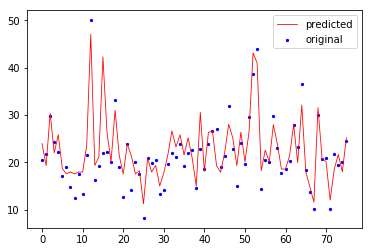

In [59]:
x_ax = range(len(ytest))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()